In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd Desktop/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1656953029714.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,07/01/2022,3825.33,--,3781.00,3829.82,3752.10
1,06/30/2022,3785.38,--,3785.99,3818.99,3738.67
2,06/29/2022,3818.83,--,3825.09,3836.50,3799.02
3,06/28/2022,3821.55,--,3913.00,3945.86,3820.14
4,06/27/2022,3900.11,--,3920.76,3927.72,3889.66
...,...,...,...,...,...,...
2543,07/10/2012,1341.47,--,1352.96,1361.54,1336.27
2544,07/09/2012,1352.46,--,1354.66,1354.87,1346.65
2545,07/06/2012,1354.68,--,1367.09,1367.09,1348.03
2546,07/05/2012,1367.58,--,1373.72,1373.85,1363.02


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2548.000000,2548.000000,2548.000000,2548.000000
mean,2607.880086,2584.427524,2597.735561,2569.827861
std,873.798004,917.573599,923.446511,910.767144
min,1334.760000,0.000000,0.000000,0.000000
25%,1981.157500,1975.180000,1983.752500,1965.280000
50%,2416.220000,2419.545000,2430.480000,2404.645000
75%,2998.447500,2999.907500,3008.057500,2984.507500
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,2618.674286,2618.338501,2631.821157,2603.547272
std,873.867327,874.166636,879.888768,867.502260
min,1334.760000,1334.810000,1341.290000,1325.410000
25%,1987.030000,1985.820000,1993.615000,1976.160000
50%,2432.540000,2431.940000,2441.620000,2421.650000
75%,3005.585000,3006.380000,3016.780000,2991.500000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2515 non-null   object 
 1   Close/Last  2515 non-null   float64
 2   Volume      2515 non-null   object 
 3   Open        2515 non-null   float64
 4   High        2515 non-null   float64
 5   Low         2515 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.5+ KB


In [5]:
df.shape

(2515, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

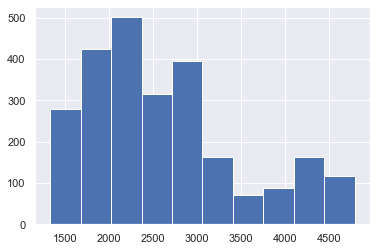

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

3825.33

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2618.6742862823153

In [10]:
close_sd = df['Close/Last'].std()
close_sd

873.8673271510098

In [11]:
sigma1 = close_mean + close_sd
sigma1

3492.541613433325

In [12]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4366.408940584335

In [13]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5240.276267735345

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.9 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2012-07-05 to 2022-07-01')

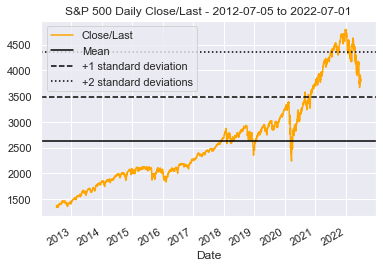

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2012-07-05 to 2022-07-01')

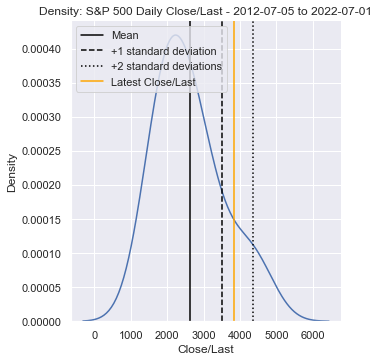

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.3808225530660754